In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))


We can plot the dataset as well as the cluster centers:

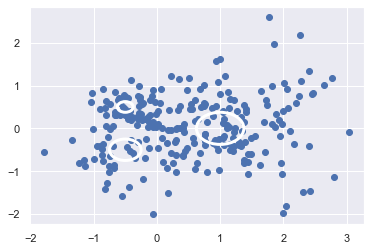

In [4]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))
plt.show()

We now write a function that initializes k centroids by randomly selecting them from the data points.

In [8]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [9]:
initialize_centroids(points, 3)

array([[ 1.97254397,  0.10857729],
       [ 0.99381355,  1.62420096],
       [-1.04685663,  0.62095638]])

Let's represent the results using a plot:

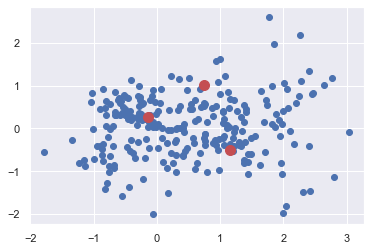

In [10]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.show()

Now let's define a function that returns the closest centroid for each point. We will use numpy broadcasting to do this.
f this code looks overly complicated, don't worry, we'll try to explain why it works in the next section.

In [11]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

We can test the code like so:

In [12]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0], dtype=int64)

To investigate this broadcasting into more detail, let's look at some intermediate steps in the computing process.
First, our variable c denotes our centroids that we want to work with. Let's look at their coordinates:

In [13]:
c

array([[ 0.09922063, -0.77659544],
       [ 1.04307956,  0.41363976],
       [-0.55691055,  0.348508  ]])

One of the interesting things with numpy is that we can extend an array by a new dimension using the np.newaxis command like this:

In [17]:
c.shape

(3, 2)

In [15]:
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 0.09922063, -0.77659544]],

       [[ 1.04307956,  0.41363976]],

       [[-0.55691055,  0.348508  ]]])

Our array, which had a shape of 3x2 becomes an array of the following shape:

In [16]:
c_extended.shape

(3, 1, 2)